In [566]:
import pandas as pd
import numpy as np
import seaborn as sns

In [567]:
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the Data

In [568]:
path = 'https://raw.githubusercontent.com/jeethroy5/files/main/SMSSpamCollection.csv'

In [569]:
emails = pd.read_csv(path, delimiter='\t', header=None)

In [570]:
emails.columns = ['labels', 'sms']
emails.head(3)

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [571]:
emails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [572]:
emails.shape

(5572, 2)

In [445]:
# This is highly imbalanced dataset 

# 2. Text Pre-processing 

In [446]:
#normalizing all the tweets to lower case

for i in range(len(emails.sms)):
    emails.sms[i] = emails.sms[i].lower()
    

In [447]:
# Checking for duplicates

emails[emails.duplicated()]

,labels,sms
103,ham,as per your request 'melle melle (oru minnamin...
154,ham,as per your request 'melle melle (oru minnamin...
207,ham,"as i entered my cabin my pa said, '' happy b'd..."
223,ham,"sorry, i'll call later"
326,ham,no calls..messages..missed calls
...,...,...
5524,spam,you are awarded a sipix digital camera! call 0...
5535,ham,"i know you are thinkin malaria. but relax, chi..."
5539,ham,just sleeping..and surfing
5553,ham,hahaha..use your brain dear


In [448]:
# Dropping the 404 duplicates SMS from the corpus

emails.drop_duplicates(ignore_index=True, inplace=True)

In [449]:
emails.head(3)

,labels,sms
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...


In [450]:
import nltk

In [451]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [452]:
#NLTK stopword list
stop_words = stopwords.words("english")

In [453]:
#Removing stopwords from all the SMS

for i in range(len(emails.sms)):
    emails.sms[i] = " ".join([w for w in emails.sms[i].split() if w not in stop_words])

In [573]:
import string

p = string.punctuation

for i in range(len(emails.sms)):
    emails.sms[i] = emails.sms[i].translate(str.maketrans("","",p))     #Remove Punctuations/special symbols
    
    emails.sms[i] = emails.sms[i].replace("  ", " ").strip()            #Remove white spaces


In [459]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [460]:
# #Stemming 

# for i in range(len(emails.sms)):
    
#     emails.sms[i] = " ".join([ps.stem(i) for i  in emails.sms[i].split()])


In [461]:
#emails.to_csv('stemmed.csv', index = False)

In [462]:
import nltk
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [463]:
>>> import nltk
>>> nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [464]:
# Lemmatisation

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()


In [465]:
for i in range(len(emails.sms)):
    
    emails.sms[i] = " ".join([lm.lemmatize(i, pos='a') for i  in emails.sms[i].split()])
    emails.sms[i] = " ".join([lm.lemmatize(i, pos='v') for i  in emails.sms[i].split()])
    emails.sms[i] = " ".join([lm.lemmatize(i, pos='r') for i  in emails.sms[i].split()])

In [466]:
emails

,labels,sms
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf live around though
...,...,...
5163,spam,2nd time try 2 contact u u £750 pound prize 2 ...
5164,ham,ü b go esplanade fr home
5165,ham,pity mood that soany suggestions
5166,ham,guy bitch act like id interest buy something e...


In [467]:
emails[emails.duplicated()]
emails.drop_duplicates(ignore_index=True, inplace=True)

In [468]:
len(emails)

5125

# 3. Data Exploration 

In [469]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [470]:
#ham and spam SMS
ham_words = ""
spam_words = ""

for i in range(emails.shape[0]):
    if emails.labels[i] == 'ham':
        ham_words += emails.sms[i]
    else:
        spam_words += emails.sms[i]

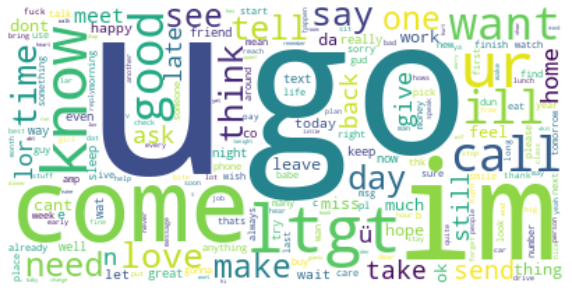

In [471]:
#Wordcloud for ham SMS

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham_words)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

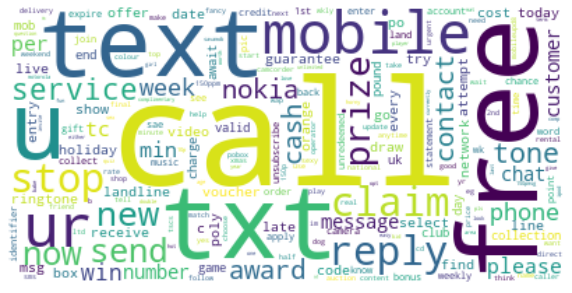

In [472]:
#Wordcloud for spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam_words)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Vectorization 

# a) Vectorization using TF. 

In [473]:
emails.shape

(5125, 2)

In [474]:
from sklearn.feature_extraction.text import CountVectorizer

In [475]:
#using count vectoroizer to create a document-term matrix
cv = CountVectorizer()

X = cv.fit_transform(emails.sms)
X = X.toarray()

In [476]:
#The word list
names = cv.get_feature_names()

In [477]:
#Converting the document-term matrix to a dataframe

tf_matrix = pd.DataFrame(X, columns=names)

In [478]:
tf_matrix.head(3)

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [479]:
# tf_matrix.apply(lambda x: np.sum(x)/len(x)*100, axis=0)

In [480]:
# freq_col = []
# for col in list(tf_matrix):
#     prop = tf_matrix[col].sum()/tf_matrix.shape[0]
#     if prop*100 >= 0.5:  
#         freq_col.append(col)

In [481]:
# len(freq_col)

In [482]:
# tf_matrix = tf_matrix[freq_col]

# b) Vectorization using TF-IDF.

In [483]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [484]:
tfidf_vectorizer = TfidfVectorizer()
tfidr_vectors = tfidf_vectorizer.fit_transform(emails.sms)

names = tfidf_vectorizer.get_feature_names()

tfidr_vectors = tfidr_vectors.toarray()
tfidr_vectors = pd.DataFrame(tfidr_vectors, columns=names)

In [485]:
tfidr_vectors

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
# freq_col = []
# for col in list(tfidr_vectors):
#     prop = tfidr_vectors[col].sum()/tfidr_vectors.shape[0]
#     if prop*100 >= 0.2:  
#         freq_col.append(col)

In [487]:
# len(freq_col)

# c) using Google’s word-to-vec model.

In [488]:
from gensim.models import KeyedVectors
import gensim

In [489]:
#embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [490]:
#embeddings

In [491]:
%%time
tokenized_data = emails.sms.apply(lambda x: x.split()) # tokenizing 

CPU times: total: 15.6 ms
Wall time: 18 ms


In [492]:
model_w2v = gensim.models.Word2Vec(
            tokenized_data,
            vector_size=300, # desired no. of features/independent variables
            window=3, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 3
) 

In [493]:
model_w2v.train(tokenized_data, total_examples= len(emails), epochs=20)

(776960, 978880)

In [494]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [495]:
wordvec_arrays = np.zeros((len(tokenized_data), 300)) 
for i in range(len(tokenized_data)):
    wordvec_arrays[i,:] = word_vector(tokenized_data[i], 300)
wrd_embd_matrix = pd.DataFrame(wordvec_arrays)
wrd_embd_matrix.shape

(5125, 300)

In [496]:
wrd_embd_matrix.to_csv('wrd_embd_matrix.csv', index=False)

In [497]:
wrd_embd_matrix = pd.read_csv('wrd_embd_matrix.csv')

In [498]:
wrd_embd_matrix

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.038261,-0.027015,-0.136578,0.166611,-0.124542,0.044326,0.009779,0.038178,-0.235691,-0.327992,...,0.202407,0.042154,-0.185358,-0.032955,-0.031779,-0.057177,0.203290,-0.117853,-0.065137,0.058041
1,0.023213,0.037898,-0.150008,0.215870,-0.114580,0.020767,-0.027705,0.075980,-0.333923,-0.272645,...,0.179637,0.012752,-0.128745,-0.075349,-0.019295,-0.115810,0.151359,0.013760,-0.079661,0.109914
2,0.005183,-0.125520,-0.106079,-0.001812,-0.203171,0.046994,0.131339,-0.020309,-0.379980,-0.458635,...,0.169883,0.116997,-0.297571,-0.027376,-0.029513,-0.035666,0.142506,-0.300302,-0.260557,-0.217466
3,0.079068,0.043152,-0.120428,0.216316,-0.192488,0.026927,-0.072686,0.045922,-0.354611,-0.258622,...,0.183759,-0.000395,-0.166696,-0.088534,-0.057650,-0.152967,0.138803,0.068576,-0.060054,0.211016
4,-0.114229,-0.084705,-0.119584,0.238505,-0.034225,0.003288,-0.022314,0.039932,-0.135737,-0.363686,...,0.186804,0.010945,-0.263071,0.019181,0.090434,0.047276,0.246279,-0.104685,-0.068753,0.106598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,-0.082389,-0.177390,-0.150754,-0.201418,-0.325072,0.048498,0.227437,0.080524,-0.312781,-0.560106,...,0.235399,0.117434,-0.309867,-0.107741,-0.044398,-0.149691,0.075551,-0.181784,-0.332697,-0.157183
5121,-0.063997,0.105332,-0.177195,0.371789,-0.038029,0.061157,-0.039944,0.085713,-0.388823,-0.233593,...,0.173847,0.014006,-0.081471,-0.117567,0.028808,-0.164758,0.184077,0.001869,-0.036477,0.110470
5122,-0.067668,-0.082559,-0.071474,0.206279,-0.019842,-0.061883,-0.099063,0.055782,-0.140223,-0.319170,...,0.174106,0.035364,-0.256576,-0.021419,0.070178,0.065797,0.286729,-0.056451,-0.086362,0.103794
5123,-0.053760,-0.066353,-0.082329,0.230090,-0.043940,-0.007263,-0.051731,0.042259,-0.216147,-0.346660,...,0.198824,0.043169,-0.216087,-0.004353,0.037395,0.046223,0.280964,-0.153335,-0.147338,0.008005


# 5. Dimension Reduction 

### dropping texts that appear in less than p% of the documents. 

### For TF  Matrix   ( < 0.5%)

In [499]:
freq_col = []
for col in list(tf_matrix):
    prop = tf_matrix[col].sum()/tf_matrix.shape[0]
    if prop*100 >= 0.5:  
        freq_col.append(col)
len(freq_col)

340

In [500]:
tf_matrix = tf_matrix[freq_col]

### For TF-IDF Matrix   ( < 0.15%)

In [501]:
freq_col = []
for col in list(tfidr_vectors):
    prop = tfidr_vectors[col].sum()/tfidr_vectors.shape[0]
    if prop*100 >= 0.15:  
        freq_col.append(col)
        
len(freq_col)

343

In [502]:
tfidr_vectors = tfidr_vectors[freq_col]

In [503]:
tfidr_vectors

,1000,18,2000,able,abt,account,actually,address,again,ah,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,you,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA 

In [504]:
from sklearn.decomposition import PCA

###  For TF vectors

In [518]:
pca = PCA()

In [519]:
pca_features = pca.fit_transform(tf_matrix)
pca_tfmatrix = pd.DataFrame(data=pca_features)

In [520]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)
ind

277

In [521]:
pca_tfmatrix = pca_tfmatrix.iloc[:, :ind]
pca_tfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.624441,0.542128,-0.553270,0.425342,0.233898,-0.488573,-0.046699,0.070962,0.278113,-0.098826,...,-0.025644,0.087568,0.016213,-0.056504,0.012407,-0.031157,0.006015,0.023077,-0.046388,-0.023549
1,-0.019178,-0.259259,-0.013069,-0.127556,0.006844,-0.159573,-0.135349,-0.062369,0.140935,0.114230,...,0.051262,0.016138,0.039885,-0.078067,0.053480,-0.047235,0.011756,0.036939,0.049947,-0.074880
2,-0.374370,0.213497,-0.038196,-0.220137,0.372084,0.177407,-0.448017,0.864224,-0.453379,0.046741,...,0.171840,-0.110687,0.064741,0.113894,0.118652,0.041295,-0.067675,0.055490,0.038972,0.119776


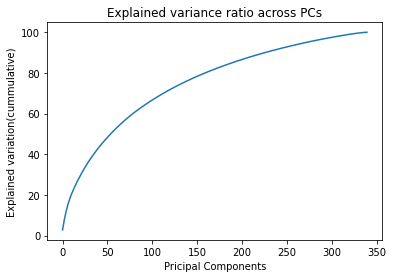

In [525]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

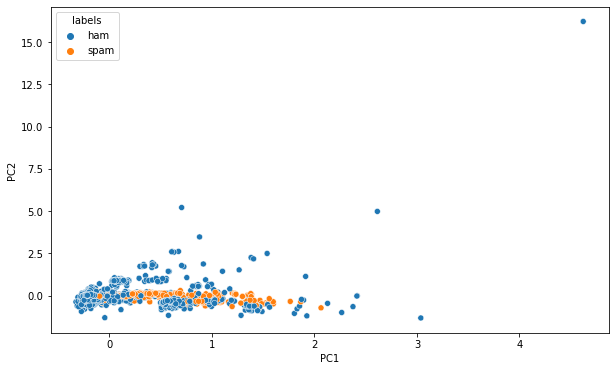

In [551]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfmatrix[1], pca_tfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###  For TF-IDF vectors

In [552]:
pca = PCA()

In [553]:
pca_features = pca.fit_transform(tfidr_vectors)
pca_tfidfmatrix = pd.DataFrame(data=pca_features)

In [554]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)
ind

291

In [555]:
pca_tfidfmatrix = pca_tfidfmatrix.iloc[:, :ind]
pca_tfidfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0.037564,-0.053778,0.028100,0.042637,-0.052950,0.091235,-0.032248,0.060080,0.015833,-0.009020,...,-0.021587,0.002233,-0.014597,-0.022697,0.001490,0.003720,0.035879,-0.035905,0.007337,0.011790
1,0.179209,0.121676,-0.126793,0.045288,-0.031882,-0.046455,-0.044683,-0.035492,-0.010150,-0.033714,...,0.023989,0.026173,-0.021838,-0.008003,-0.016152,0.012205,0.041607,0.029544,-0.043757,-0.031323
2,-0.044580,0.023345,-0.007986,0.010745,0.007401,0.026200,-0.000440,-0.035340,-0.039353,-0.051029,...,-0.016114,0.008147,-0.007819,-0.016693,0.037520,0.028537,0.042178,0.008107,-0.039913,-0.018645


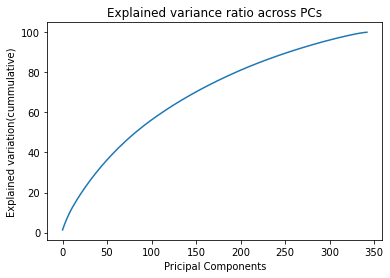

In [556]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

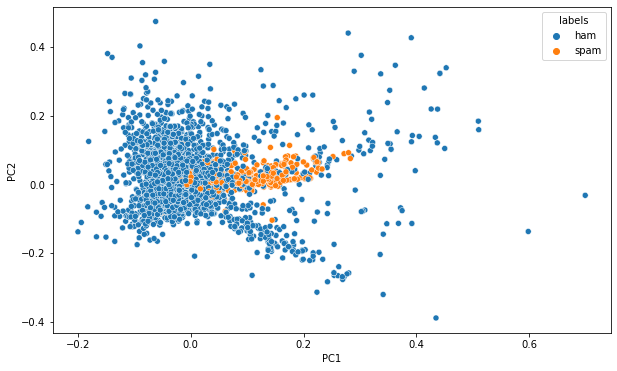

In [558]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfidfmatrix[1], pca_tfidfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### For Doccccc vectors

In [559]:
pca = PCA()

In [560]:
pca_features = pca.fit_transform(wrd_embd_matrix)
pca_wrd_embd_matrix = pd.DataFrame(data=pca_features)

In [561]:
ind = np.sum(np.cumsum(np.round((pca.explained_variance_ratio_*100),1)) < 95.1)
ind

10

In [562]:
pca_tfidfmatrix = pca_tfidfmatrix.iloc[:, :ind]
pca_tfidfmatrix.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.037564,-0.053778,0.028100,0.042637,-0.052950,0.091235,-0.032248,0.060080,0.015833,-0.009020
1,0.179209,0.121676,-0.126793,0.045288,-0.031882,-0.046455,-0.044683,-0.035492,-0.010150,-0.033714
2,-0.044580,0.023345,-0.007986,0.010745,0.007401,0.026200,-0.000440,-0.035340,-0.039353,-0.051029


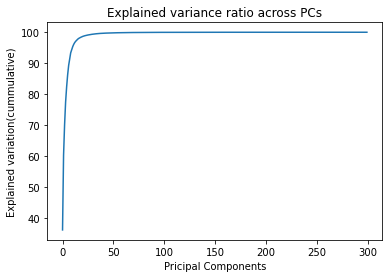

In [563]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100 )
plt.title('Explained variance ratio across PCs')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variation(cummulative)')
plt.show()

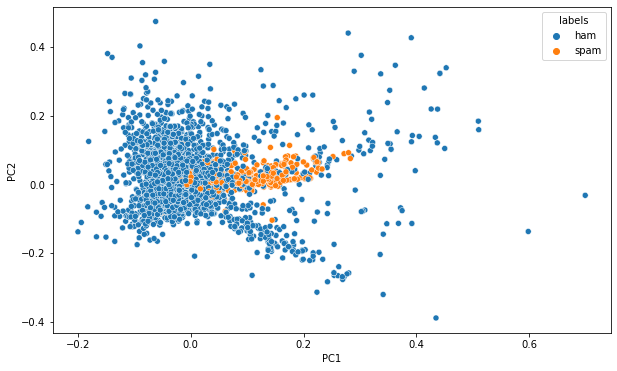

In [565]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_tfidfmatrix[1], pca_tfidfmatrix[2], hue=emails['labels'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# -------------------------------------------------------------------------------------------------

In [82]:
def performance_evaluation(y , y_pred, t = True):
    if t:
        print("Accuracy score of train data:", np.round(accuracy_score(y, y_pred)*100, 2))
        print("Recall score of train data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("Precision score of train data: ", np.round(precision_score(y, y_pred)*100, 2))
        print("F1 score of train data:      ", np.round(f1_score(y, y_pred)*100, 2))
    else:
        print("Accuracy score of test data:", np.round(accuracy_score(y, y_pred)*100, 2))
        print("Recall score of test data:  ", np.round(recall_score(y, y_pred)*100, 2))
        print("Precision score of test data: ", np.round(precision_score(y, y_pred)*100, 2))
        print("F1 score of test data:      ", np.round(f1_score(y, y_pred)*100, 2))

# Model Fitting  

# Fitting different models for TF (without PCA)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [108]:
y = np.where(emails['labels'] == 'spam',1, 0)

In [109]:
tf_matrix.head()

,100,1000,150,150ppm,16,18,1st,2000,2nd,500,...,would,xxx,ya,yeah,year,yes,yet,yo,you,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X = tf_matrix
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

### 1. Logistic Regression

In [111]:
lrc = LogisticRegression().fit(X_train, y_train)

In [112]:
y_train_pred = lrc.predict(X_train)

In [113]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.94
Recall score of train data:   84.57
Precision score of train data:  98.52
F1 score of train data:       91.01


In [114]:
y_pred = lrc.predict(X_test)

In [115]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.18
Recall score of test data:   72.78
Precision score of test data:  95.04
F1 score of test data:       82.44


### 2. Decision Tree

In [116]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [117]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.71
Recall score of train data:   97.89
Precision score of train data:  99.78
F1 score of train data:       98.83


In [118]:
y_pred = dtc.predict(X_test)

In [119]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.32
Recall score of train data:   75.95
Precision score of train data:  84.51
F1 score of train data:       80.0


In [ ]:
# GridSearchCV

In [124]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,50)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=36, max_features='auto')

In [126]:
dtc = DecisionTreeClassifier(max_depth=36, max_features='auto').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [127]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.99
Recall score of train data:   91.75
Precision score of train data:  100.0
F1 score of train data:       95.7


In [128]:
y_pred = dtc.predict(X_test)

In [129]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.01
Recall score of test data:   74.05
Precision score of test data:  83.57
F1 score of test data:       78.52


In [ ]:
# Pruning 

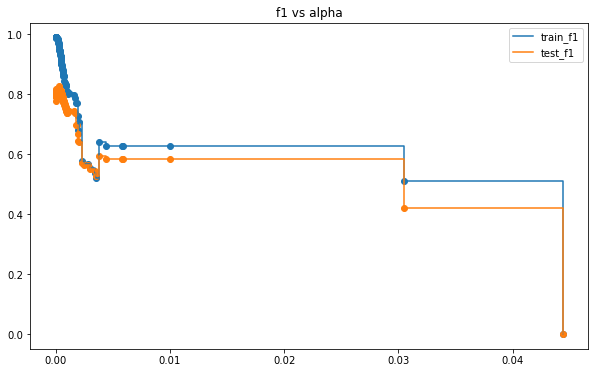

In [130]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [138]:
alpha = 0.03
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03)

In [139]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 90.87
Recall score of train data:   61.95
Precision score of train data:  63.15
F1 score of train data:       62.54


In [140]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 90.48
Recall score of test data:   53.8
Precision score of test data:  63.43
F1 score of test data:       58.22


### 3. Random Forset 

In [141]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [142]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.71
Recall score of train data:   97.89
Precision score of train data:  99.78
F1 score of train data:       98.83


In [143]:
y_pred = rfc.predict(X_test)

In [144]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.88
Recall score of test data:   80.38
Precision score of test data:  93.38
F1 score of test data:       86.39


### 4. KNN Classifier 

In [145]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [146]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 94.98
Recall score of train data:   59.62
Precision score of train data:  99.3
F1 score of train data:       74.5


In [147]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 93.29
Recall score of train data:   46.2
Precision score of train data:  98.65
F1 score of train data:       62.93


### 5. AdaBoost 

In [149]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.22
Recall score of train data:   83.3
Precision score of train data:  93.36
F1 score of train data:       88.04


In [150]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.49
Recall score of train data:   77.22
Precision score of train data:  93.13
F1 score of train data:       84.43


In [152]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [153]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.94
Recall score of train data:   86.47
Precision score of train data:  96.46
F1 score of train data:       91.19


In [154]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.57
Recall score of train data:   76.58
Precision score of train data:  94.53
F1 score of train data:       84.62


###  Bagging

In [156]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.53
Recall score of train data:   96.19
Precision score of train data:  100.0
F1 score of train data:       98.06


In [157]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.02
Recall score of test data:   76.58
Precision score of test data:  89.63
F1 score of test data:       82.59


In [159]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [162]:
scores, models

([0.6708860759493671,
  0.6835443037974683,
  0.7721518987341772,
  0.7911392405063291,
  0.7721518987341772,
  0.7911392405063291,
  0.7658227848101266,
  0.7911392405063291],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [163]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.35
Recall score of train data:   95.14
Precision score of train data:  99.56
F1 score of train data:       97.3


In [164]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.48
Recall score of test data:   75.95
Precision score of test data:  85.71
F1 score of test data:       80.54


# -------------------------------------------------------------------------------------------

In [168]:
y = np.where(emails['labels'] == 'spam', 1, 0)

In [182]:
X = tfidr_vectors
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [177]:
lrc = LogisticRegression().fit(X_train, y_train)

In [178]:
y_train_pred = lrc.predict(X_train)

In [179]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 93.29
Recall score of train data:   46.79
Precision score of train data:  95.88
F1 score of train data:       62.89


In [180]:
y_pred = lrc.predict(X_test)

In [181]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 91.9
Recall score of test data:   39.85
Precision score of test data:  94.64
F1 score of test data:       56.08


### 2. Decision Tree

In [183]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [184]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.85
Recall score of train data:   98.81
Precision score of train data:  100.0
F1 score of train data:       99.4


In [185]:
y_pred = dtc.predict(X_test)

In [186]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 94.83
Recall score of train data:   80.16
Precision score of train data:  78.29
F1 score of train data:       79.22


In [187]:
# GridSearchCV

In [188]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,14)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='sqrt')

In [189]:
dtc = DecisionTreeClassifier(max_depth=13, max_features='sqrt').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [190]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 94.1
Recall score of train data:   53.47
Precision score of train data:  97.47
F1 score of train data:       69.05


In [191]:
y_pred = dtc.predict(X_test)

In [192]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.56
Recall score of test data:   56.35
Precision score of test data:  86.59
F1 score of test data:       68.27


In [ ]:
# Pruning 

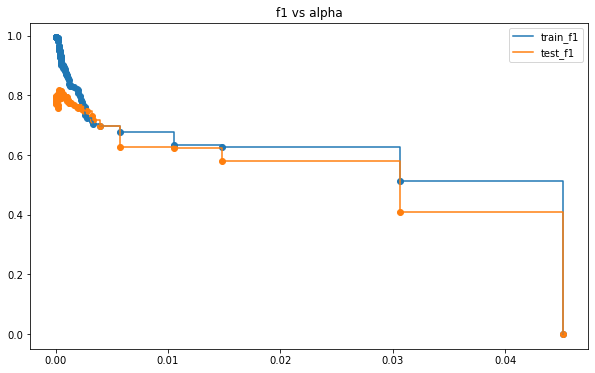

In [193]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [197]:
alpha = 0.005
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [198]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 93.02
Recall score of train data:   65.35
Precision score of train data:  74.83
F1 score of train data:       69.77


In [199]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 92.78
Recall score of test data:   67.46
Precision score of test data:  72.03
F1 score of test data:       69.67


### 3. Random Forset 

In [200]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [201]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.85
Recall score of train data:   98.81
Precision score of train data:  100.0
F1 score of train data:       99.4


In [202]:
y_pred = rfc.predict(X_test)

In [203]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.68
Recall score of test data:   81.75
Precision score of test data:  90.35
F1 score of test data:       85.83


### 4. KNN Classifier 

In [204]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [205]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.59
Recall score of train data:   77.23
Precision score of train data:  93.98
F1 score of train data:       84.78


In [206]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.8
Recall score of train data:   70.63
Precision score of train data:  93.68
F1 score of train data:       80.54


### 5. AdaBoost 

In [207]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.44
Recall score of train data:   81.98
Precision score of train data:  96.73
F1 score of train data:       88.75


In [208]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.71
Recall score of train data:   75.4
Precision score of train data:  87.96
F1 score of train data:       81.2


In [209]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [210]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.22
Recall score of train data:   88.51
Precision score of train data:  96.75
F1 score of train data:       92.45


In [211]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.41
Recall score of train data:   73.81
Precision score of train data:  86.92
F1 score of train data:       79.83


###  Bagging

In [212]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.39
Recall score of train data:   95.25
Precision score of train data:  99.79
F1 score of train data:       97.47


In [213]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.12
Recall score of test data:   76.19
Precision score of test data:  82.76
F1 score of test data:       79.34


In [159]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [162]:
scores, models

([0.6708860759493671,
  0.6835443037974683,
  0.7721518987341772,
  0.7911392405063291,
  0.7721518987341772,
  0.7911392405063291,
  0.7658227848101266,
  0.7911392405063291],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [163]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.35
Recall score of train data:   95.14
Precision score of train data:  99.56
F1 score of train data:       97.3


In [164]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.48
Recall score of test data:   75.95
Precision score of test data:  85.71
F1 score of test data:       80.54


# -------------------------------------------------------------------------------------------------------------

In [214]:
y = np.where(emails['labels'] == 'spam', 1, 0)

In [215]:
X = wrd_embd_matrix
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

### 1. Logistic Regression

In [216]:
lrc = LogisticRegression().fit(X_train, y_train)

In [217]:
y_train_pred = lrc.predict(X_train)

In [218]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.8
Recall score of train data:   82.24
Precision score of train data:  90.89
F1 score of train data:       86.35


In [219]:
y_pred = lrc.predict(X_test)

In [220]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.63
Recall score of test data:   74.05
Precision score of test data:  88.64
F1 score of test data:       80.69


### 2. Decision Tree

In [221]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [222]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.97
Recall score of train data:   99.79
Precision score of train data:  100.0
F1 score of train data:       99.89


In [223]:
y_pred = dtc.predict(X_test)

In [224]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 94.07
Recall score of train data:   78.48
Precision score of train data:  74.7
F1 score of train data:       76.54


In [ ]:
# GridSearchCV

In [225]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,14)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [226]:
dtc = DecisionTreeClassifier(max_depth=5, max_features='sqrt').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [227]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.76
Recall score of train data:   87.74
Precision score of train data:  93.68
F1 score of train data:       90.61


In [228]:
y_pred = dtc.predict(X_test)

In [229]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.55
Recall score of test data:   79.75
Precision score of test data:  83.44
F1 score of test data:       81.55


In [230]:
# Pruning 

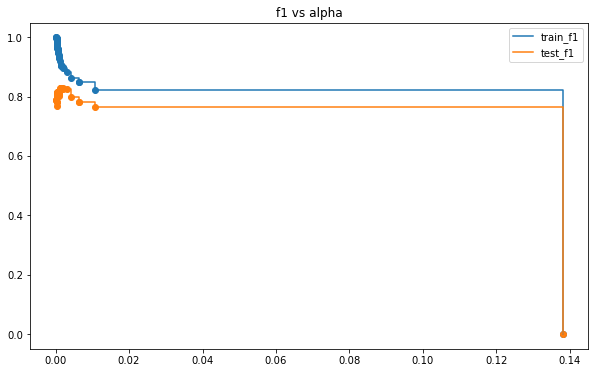

In [231]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [235]:
alpha = 0.05
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05)

In [236]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.78
Recall score of train data:   79.7
Precision score of train data:  85.1
F1 score of train data:       82.31


In [237]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 94.54
Recall score of test data:   72.15
Precision score of test data:  81.43
F1 score of test data:       76.51


### 3. Random Forset 

In [238]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [239]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.97
Recall score of train data:   99.79
Precision score of train data:  100.0
F1 score of train data:       99.89


In [240]:
y_pred = rfc.predict(X_test)

In [241]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.35
Recall score of test data:   83.54
Precision score of test data:  94.29
F1 score of test data:       88.59


### 4. KNN Classifier 

In [242]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [243]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.71
Recall score of train data:   89.01
Precision score of train data:  92.12
F1 score of train data:       90.54


In [244]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.18
Recall score of train data:   85.44
Precision score of train data:  83.85
F1 score of train data:       84.64


In [246]:
from sklearn.model_selection import cross_validate, StratifiedKFold

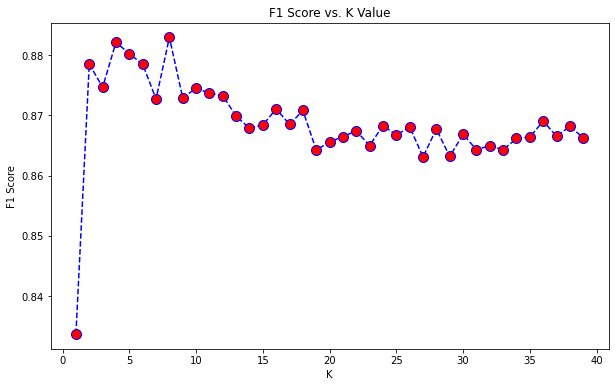

In [248]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))
    #print(np.round(np.var(knn['test_score']),4))

d = depth
f = mean_f1
plt.figure(figsize=(10,6))
plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

In [249]:
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.37
Recall score of train data:   84.78
Precision score of train data:  93.26
F1 score of train data:       88.82


In [250]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.1
Recall score of train data:   82.28
Precision score of train data:  85.53
F1 score of train data:       83.87


### 5. AdaBoost 

In [251]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.44
Recall score of train data:   91.97
Precision score of train data:  95.19
F1 score of train data:       93.55


In [252]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.18
Recall score of train data:   80.38
Precision score of train data:  87.59
F1 score of train data:       83.83


In [253]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_


KeyboardInterrupt



In [ ]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

In [ ]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

###  Bagging

In [254]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.79
Recall score of train data:   98.31
Precision score of train data:  100.0
F1 score of train data:       99.15


In [255]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.65
Recall score of test data:   80.38
Precision score of test data:  91.37
F1 score of test data:       85.52


In [256]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [257]:
scores, models

([0.7658227848101266,
  0.7658227848101266,
  0.7848101265822784,
  0.8037974683544303,
  0.8037974683544303,
  0.8417721518987342,
  0.8227848101265823,
  0.8164556962025317],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [258]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.61
Recall score of train data:   97.04
Precision score of train data:  99.78
F1 score of train data:       98.39


In [259]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.8
Recall score of test data:   79.75
Precision score of test data:  93.33
F1 score of test data:       86.01


# PCA Data 

# ------------------------------------------------------------------------------------------

In [263]:
X = pca_tfmatrix
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3, stratify=y)

### 1. Logistic Regression

In [264]:
lrc = LogisticRegression().fit(X_train, y_train)

In [265]:
y_train_pred = lrc.predict(X_train)

In [266]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.8
Recall score of train data:   83.37
Precision score of train data:  98.59
F1 score of train data:       90.34


In [267]:
y_pred = lrc.predict(X_test)

In [268]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.07
Recall score of test data:   83.33
Precision score of test data:  92.11
F1 score of test data:       87.5


### 2. Decision Tree

In [269]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [270]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.73
Recall score of train data:   98.02
Precision score of train data:  99.8
F1 score of train data:       98.9


In [271]:
y_pred = dtc.predict(X_test)

In [272]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 92.88
Recall score of train data:   77.78
Precision score of train data:  68.53
F1 score of train data:       72.86


In [273]:
# GridSearchCV

In [274]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,50)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='sqrt')

In [275]:
dtc = DecisionTreeClassifier(max_depth=7, max_features='sqrt').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [276]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 93.85
Recall score of train data:   58.02
Precision score of train data:  87.99
F1 score of train data:       69.93


In [277]:
y_pred = dtc.predict(X_test)

In [278]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 90.54
Recall score of test data:   46.83
Precision score of test data:  66.29
F1 score of test data:       54.88


In [279]:
# Pruning 

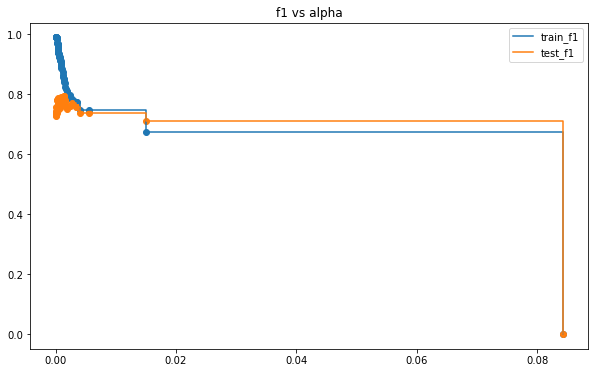

In [280]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [281]:
alpha = 0.01
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [282]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 94.44
Recall score of train data:   66.53
Precision score of train data:  85.06
F1 score of train data:       74.67


In [283]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 94.24
Recall score of test data:   65.08
Precision score of test data:  84.54
F1 score of test data:       73.54


### 3. Random Forset 

In [284]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [285]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.73
Recall score of train data:   98.02
Precision score of train data:  99.8
F1 score of train data:       98.9


In [286]:
y_pred = rfc.predict(X_test)

In [287]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.2
Recall score of test data:   69.84
Precision score of test data:  98.88
F1 score of test data:       81.86


### 4. KNN Classifier 

In [288]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [289]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.39
Recall score of train data:   63.76
Precision score of train data:  98.17
F1 score of train data:       77.31


In [290]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 94.63
Recall score of train data:   57.14
Precision score of train data:  98.63
F1 score of train data:       72.36


### 5. AdaBoost 

In [291]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.32
Recall score of train data:   82.97
Precision score of train data:  94.58
F1 score of train data:       88.4


In [292]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.39
Recall score of train data:   78.57
Precision score of train data:  90.83
F1 score of train data:       84.26


In [293]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_


KeyboardInterrupt



In [ ]:
adc= AdaBoostClassifier(learning_rate= , n_estimators= ).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

In [ ]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

###  Bagging

In [294]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.17
Recall score of train data:   94.06
Precision score of train data:  99.16
F1 score of train data:       96.54


In [295]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.71
Recall score of test data:   76.98
Precision score of test data:  86.61
F1 score of test data:       81.51


In [296]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [297]:
scores, models

([0.6904761904761905,
  0.753968253968254,
  0.7380952380952381,
  0.753968253968254,
  0.746031746031746,
  0.7698412698412699,
  0.7857142857142857,
  0.7936507936507936],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [163]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.35
Recall score of train data:   95.14
Precision score of train data:  99.56
F1 score of train data:       97.3


In [298]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.2
Recall score of test data:   79.37
Precision score of test data:  88.5
F1 score of test data:       83.68


In [299]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [300]:
clf = HistGradientBoostingClassifier(random_state=0)

# Fit the classifier on the training data
clf.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=0)

In [301]:
y_train_pred = clf.predict(X_train)

In [302]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.76
Recall score of train data:   98.42
Precision score of train data:  99.6
F1 score of train data:       99.0


In [303]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 97.07
Recall score of train data:   80.95
Precision score of train data:  94.44
F1 score of train data:       87.18


# --------------------------------------------------------------------- 

In [305]:
X = pca_tfidfmatrix
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [306]:
lrc = LogisticRegression().fit(X_train, y_train)

In [307]:
y_train_pred = lrc.predict(X_train)

In [308]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 89.17
Recall score of train data:   18.02
Precision score of train data:  75.21
F1 score of train data:       29.07


In [309]:
y_pred = lrc.predict(X_test)

In [310]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 88.78
Recall score of test data:   13.49
Precision score of test data:  73.91
F1 score of test data:       22.82


### 2. Decision Tree

In [311]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [312]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.85
Recall score of train data:   98.81
Precision score of train data:  100.0
F1 score of train data:       99.4


In [313]:
y_pred = dtc.predict(X_test)

In [314]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 90.44
Recall score of train data:   66.67
Precision score of train data:  60.0
F1 score of train data:       63.16


In [315]:
# GridSearchCV

In [188]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,14)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='sqrt')

In [189]:
dtc = DecisionTreeClassifier(max_depth=13, max_features='sqrt').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [190]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 94.1
Recall score of train data:   53.47
Precision score of train data:  97.47
F1 score of train data:       69.05


In [191]:
y_pred = dtc.predict(X_test)

In [192]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.56
Recall score of test data:   56.35
Precision score of test data:  86.59
F1 score of test data:       68.27


In [ ]:
# Pruning 

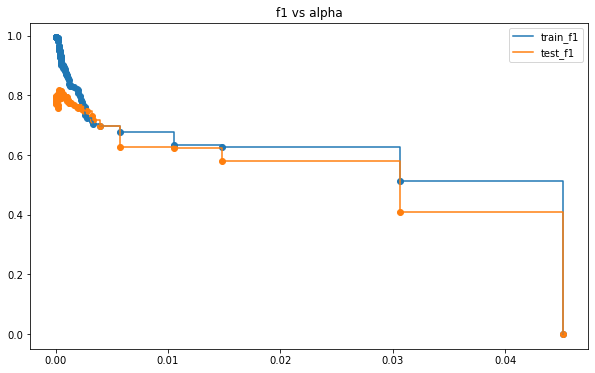

In [193]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [197]:
alpha = 0.005
clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [198]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 93.02
Recall score of train data:   65.35
Precision score of train data:  74.83
F1 score of train data:       69.77


In [199]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 92.78
Recall score of test data:   67.46
Precision score of test data:  72.03
F1 score of test data:       69.67


### 3. Random Forset 

In [316]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [317]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.85
Recall score of train data:   98.81
Precision score of train data:  100.0
F1 score of train data:       99.4


In [318]:
y_pred = rfc.predict(X_test)

In [319]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.76
Recall score of test data:   61.9
Precision score of test data:  82.98
F1 score of test data:       70.91


### 4. KNN Classifier 

In [320]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [321]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.46
Recall score of train data:   82.77
Precision score of train data:  87.82
F1 score of train data:       85.22


In [322]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 93.27
Recall score of train data:   71.43
Precision score of train data:  73.17
F1 score of train data:       72.29


### 5. AdaBoost 

In [323]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 95.15
Recall score of train data:   73.27
Precision score of train data:  85.25
F1 score of train data:       78.81


In [324]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 91.51
Recall score of train data:   60.32
Precision score of train data:  67.26
F1 score of train data:       63.6


In [209]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[ 0.01, 0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [210]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators=100).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.22
Recall score of train data:   88.51
Precision score of train data:  96.75
F1 score of train data:       92.45


In [211]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.41
Recall score of train data:   73.81
Precision score of train data:  86.92
F1 score of train data:       79.83


###  Bagging

In [325]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.22
Recall score of train data:   94.06
Precision score of train data:  99.58
F1 score of train data:       96.74


In [326]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 92.68
Recall score of test data:   61.11
Precision score of test data:  74.76
F1 score of test data:       67.25


In [159]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [162]:
scores, models

([0.6708860759493671,
  0.6835443037974683,
  0.7721518987341772,
  0.7911392405063291,
  0.7721518987341772,
  0.7911392405063291,
  0.7658227848101266,
  0.7911392405063291],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [327]:
clf = BaggingClassifier(n_estimators=12).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.37
Recall score of train data:   94.85
Precision score of train data:  100.0
F1 score of train data:       97.36


In [328]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.37
Recall score of test data:   62.7
Precision score of test data:  79.0
F1 score of test data:       69.91


# ---------------------------------------------------------------------------

In [329]:
X = pca_wrd_embd_matrix
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

### 1. Logistic Regression

In [330]:
lrc = LogisticRegression().fit(X_train, y_train)

In [331]:
y_train_pred = lrc.predict(X_train)

In [332]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.71
Recall score of train data:   81.78
Precision score of train data:  90.57
F1 score of train data:       85.95


In [333]:
y_pred = lrc.predict(X_test)

In [334]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.71
Recall score of test data:   76.19
Precision score of test data:  87.27
F1 score of test data:       81.36


### 2. Decision Tree

In [335]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [336]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.98
Recall score of train data:   99.8
Precision score of train data:  100.0
F1 score of train data:       99.9


In [337]:
y_pred = dtc.predict(X_test)

In [338]:
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 95.51
Recall score of train data:   82.54
Precision score of train data:  81.25
F1 score of train data:       81.89


In [339]:
# GridSearchCV

In [188]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,14)
    
}

DT_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5) #using standard value of cv=5
DT_rfc.fit(X_train, y_train)

DT_rfc.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='sqrt')

In [189]:
dtc = DecisionTreeClassifier(max_depth=13, max_features='sqrt').fit(X_train, y_train)
y_train_pred= dtc.predict(X_train)

In [190]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 94.1
Recall score of train data:   53.47
Precision score of train data:  97.47
F1 score of train data:       69.05


In [191]:
y_pred = dtc.predict(X_test)

In [192]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 93.56
Recall score of test data:   56.35
Precision score of test data:  86.59
F1 score of test data:       68.27


In [ ]:
# Pruning 

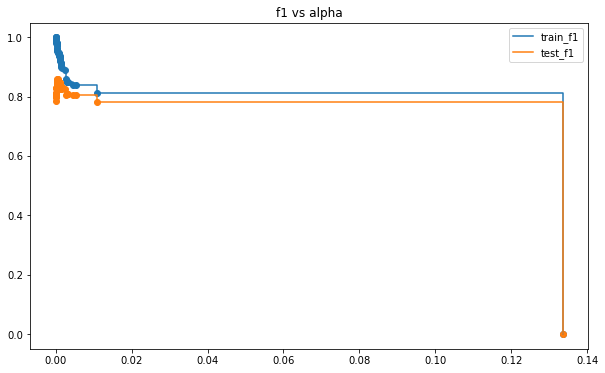

In [340]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_f1, test_f1 = [], []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_pred = c.predict(X_test)
    train_f1.append(f1_score(y_train_pred, y_train))
    test_f1.append(f1_score(y_pred, y_test))


plt.figure(figsize=(10,6))

plt.scatter(ccp_alphas,train_f1)
plt.scatter(ccp_alphas,test_f1)
plt.plot(ccp_alphas,train_f1,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_f1,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('f1 vs alpha')
plt.show()

In [347]:
alpha = 0.01

clf = DecisionTreeClassifier(ccp_alpha=alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [348]:
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 96.2
Recall score of train data:   80.2
Precision score of train data:  87.85
F1 score of train data:       83.85


In [349]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 95.51
Recall score of test data:   75.4
Precision score of test data:  86.36
F1 score of test data:       80.51


### 3. Random Forset 

In [350]:
rfc= RandomForestClassifier().fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [351]:
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.98
Recall score of train data:   99.8
Precision score of train data:  100.0
F1 score of train data:       99.9


In [352]:
y_pred = rfc.predict(X_test)

In [353]:
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.1
Recall score of test data:   70.63
Precision score of test data:  96.74
F1 score of test data:       81.65


### 4. KNN Classifier 

In [354]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [355]:
y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 97.68
Recall score of train data:   89.5
Precision score of train data:  91.5
F1 score of train data:       90.49


In [356]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.0
Recall score of train data:   84.92
Precision score of train data:  82.95
F1 score of train data:       83.92


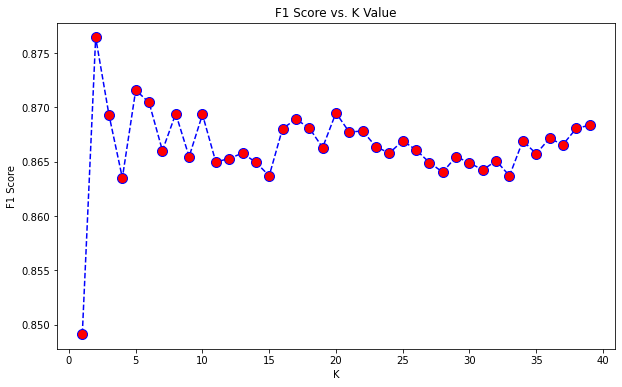

In [357]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))
    #print(np.round(np.var(knn['test_score']),4))

d = depth
f = mean_f1
plt.figure(figsize=(10,6))
plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

In [360]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.54
Recall score of train data:   88.12
Precision score of train data:  100.0
F1 score of train data:       93.68


In [361]:
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.1
Recall score of test data:   81.75
Precision score of test data:  85.83
F1 score of test data:       83.74


### 5. AdaBoost 

In [362]:
adc= AdaBoostClassifier().fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 98.73
Recall score of train data:   93.66
Precision score of train data:  95.94
F1 score of train data:       94.79


In [363]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.68
Recall score of train data:   84.13
Precision score of train data:  88.33
F1 score of train data:       86.18


In [365]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'learning_rate' :[0.1, 1.0]
}

CV_adc = GridSearchCV(estimator=adc, param_grid=param_grid, cv= 5) #Using Grid Search Cv for finding optimal params
CV_adc.fit(X_train, y_train)

CV_adc.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [366]:
adc= AdaBoostClassifier(learning_rate=1, n_estimators= 200).fit(X_train,y_train)
y_train_pred= adc.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.98
Recall score of train data:   99.8
Precision score of train data:  100.0
F1 score of train data:       99.9


In [367]:
y_pred = adc.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of train data: 96.78
Recall score of train data:   83.33
Precision score of train data:  89.74
F1 score of train data:       86.42


###  Bagging

In [368]:
clf = BaggingClassifier().fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.63
Recall score of train data:   97.03
Precision score of train data:  100.0
F1 score of train data:       98.49


In [369]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 96.78
Recall score of test data:   81.75
Precision score of test data:  91.15
F1 score of test data:       86.19


In [370]:
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(recall_score(y_test, y_pred))

In [371]:
scores, models

([0.6984126984126984,
  0.7857142857142857,
  0.8015873015873016,
  0.8174603174603174,
  0.8333333333333334,
  0.8015873015873016,
  0.8015873015873016,
  0.8412698412698413],
 [BaggingClassifier(n_estimators=2),
  BaggingClassifier(n_estimators=4),
  BaggingClassifier(n_estimators=6),
  BaggingClassifier(n_estimators=8),
  BaggingClassifier(),
  BaggingClassifier(n_estimators=12),
  BaggingClassifier(n_estimators=14),
  BaggingClassifier(n_estimators=16)])

In [373]:
clf = BaggingClassifier(n_estimators=16).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.83
Recall score of train data:   98.61
Precision score of train data:  100.0
F1 score of train data:       99.3


In [374]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.07
Recall score of test data:   84.13
Precision score of test data:  91.38
F1 score of test data:       87.6


In [375]:

base_clf = DecisionTreeClassifier()

# Define the bagging classifier
bagging = BaggingClassifier(base_estimator=base_clf)

# Define the hyperparameter grid for grid search
param_grid = {'n_estimators': [10, 20, 30],
              'max_samples': [0.5, 0.7, 1.0],
              'max_features': [0.5, 0.7, 1.0]}

# Create the grid search object
grid_search = GridSearchCV(bagging, param_grid, cv=5)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}


In [389]:
clf = BaggingClassifier(n_estimators=30).fit(X_train, y_train)
    
y_train_pred = clf.predict(X_train)
performance_evaluation(y_train, y_train_pred)

Accuracy score of train data: 99.9
Recall score of train data:   99.21
Precision score of train data:  100.0
F1 score of train data:       99.6


In [390]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.66
Recall score of test data:   86.51
Precision score of test data:  93.97
F1 score of test data:       90.08


In [388]:
y_pred = clf.predict(X_test)
performance_evaluation(y_test, y_pred, False)

Accuracy score of test data: 97.37
Recall score of test data:   85.71
Precision score of test data:  92.31
F1 score of test data:       88.89


In [514]:
from sklearn.metrics import classification_report